# Problem 1

## Part 1
Choose a small but nonzero $\epsilon$ such that rank $(A) = 3$. Compute the conditioning number to check that $A$ is ill-conditioned

I'll make a range of $\epsilon$ values and plot the condition number for each

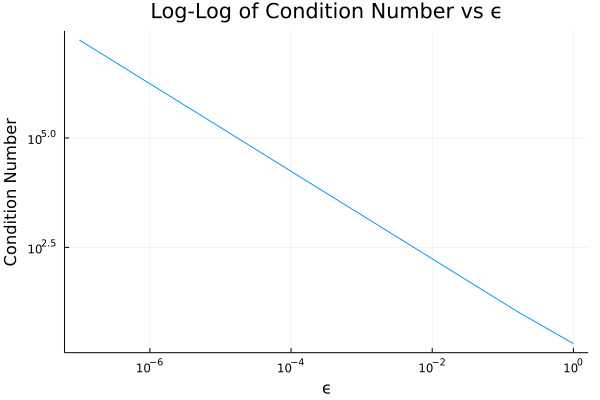

In [1]:
using LinearAlgebra
using Plots
ϵs = 10.0 .^ range(start = -7, stop = 0, length = 10)
ks = [cond([1 1 1 ; ϵ 0 0 ; 0 ϵ 0; 0 0 ϵ] ) for ϵ in ϵs]
plot(ϵs, ks, xaxis=:log, yaxis=:log, xlabel = "ϵ",ylabel="Condition Number", leg=false, title = "Log-Log of Condition Number vs ϵ")

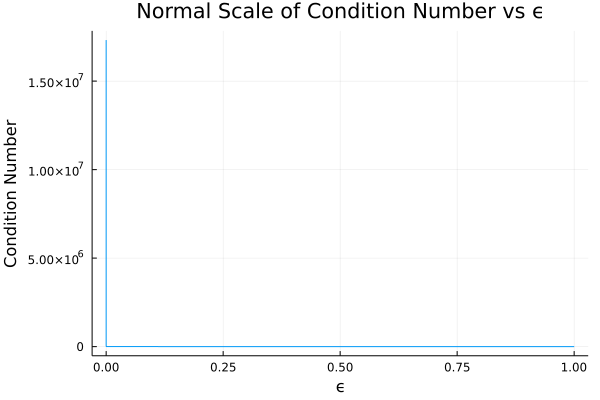

In [2]:
plot(ϵs, ks,  xlabel = "ϵ",ylabel="Condition Number", leg=false, title = "Normal Scale of Condition Number vs ϵ")

## Part 2

Compute the least squares solution to $Ax=b$ using the following three methods:

- normal equations
- QR factorization
- SVD

In [4]:
ϵ = 0.01
A = [1 1 1 ; ϵ 0 0 ; 0 ϵ 0; 0 0 ϵ] 
b = [3; ϵ ; ϵ ; ϵ]
x_ans = [1; 1; 1.0]

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [5]:
using Test
@test A' * A \ A' * b ≈ x_ans

Test Passed
  Expression: ((A' * A) \ A') * b ≈ x_ans
   Evaluated: [0.9999999999995595, 0.9999999999998359, 1.000000000000605] ≈ [1.0, 1.0, 1.0]

In [6]:
Q, R = qr(A)
@test R \ (Q[:,1:3]' * b) ≈ x_ans

Test Passed
  Expression: R \ ((Q[:, 1:3])' * b) ≈ x_ans
   Evaluated: [1.0, 1.0000000000000007, 0.9999999999999993] ≈ [1.0, 1.0, 1.0]

In [7]:
U, S, V = svd(A)
x = V * inv(diagm(S)) * U' * b
@test x ≈ x_ans


Test Passed
  Expression: x ≈ x_ans
   Evaluated: [1.0000000000000002, 0.9999999999999996, 0.9999999999999998] ≈ [1.0, 1.0, 1.0]

In [8]:
@test A * x  ≈ b

Test Passed
  Expression: A * x ≈ b
   Evaluated: [2.9999999999999996, 0.010000000000000002, 0.009999999999999995, 0.009999999999999998] ≈ [3.0, 0.01, 0.01, 0.01]